In [ ]:
import xarray as xr
import json

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลา
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# คำนวณค่าเฉลี่ยอุณหภูมิต่อกริด
data_avg = temp['tmp'].mean(dim='time')

# สร้าง DataFrame จากข้อมูล NetCDF
lon, lat = data_avg.lon.values, data_avg.lat.values
temp_values = data_avg.values
#print(temp_values)

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(lon[1] - lon[0])
lat_step = float(lat[1] - lat[0])


# เตรียมข้อมูลในรูปแบบ JSON
features = []
for i, lon_value in enumerate(lon):
    for j, lat_value in enumerate(lat):
        temperature = temp_values[j, i]
        if not pd.isnull(temperature):  # ตรวจสอบว่าไม่มี NaN
            grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
            features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [grid_polygon]
                },
                "properties": {
                    "temperature": float(temperature)  # แปลง float32 เป็น float
                }
            })
            print(grid_polygon)

# สร้างโครงสร้าง GeoJSON
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# บันทึกข้อมูลเป็นไฟล์ GeoJSON
output_file = "../Geo-data/nc_to_json_2001.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(geojson_data, f, ensure_ascii=False, indent=4)

print(f"ข้อมูลถูกบันทึกในไฟล์ {output_file}")


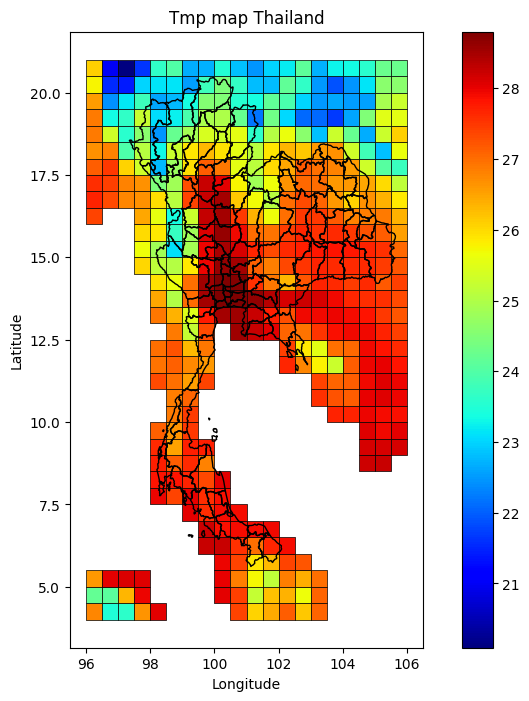

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2001.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# สร้าง plot
fig, ax = plt.subplots(figsize=(10, 8))

# แสดงผลข้อมูลพื้นที่ด้วย GeoPandas
data.plot(column='temperature', cmap='jet', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

shapefile.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title('Tmp map Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [7]:
import xarray as xr
import pandas as pd

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลา
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# ดูข้อมูลในมิติ time ว่ามีวันหรือเดือนอะไรบ้าง
time_values = temp['time'].values
time_dates = pd.to_datetime(time_values)

print(time_dates)
# # ตรวจสอบจำนวนวันที่มีในปี 2001
# num_times = len(time_dates)
# print(f"จำนวนวันที่มีในปี {year}: {num_times}")

# # ตรวจสอบจำนวน grid (lat x lon)
# num_lat = len(temp['lat'])
# num_lon = len(temp['lon'])
# num_grids = num_lat * num_lon
# print(f"จำนวนพิกัด grid (lat x lon): {num_grids}")

# # คำนวณจำนวนข้อมูลทั้งหมดในปี 2001
# total_data_points = num_times * num_grids
# print(f"จำนวนข้อมูลทั้งหมดในปี {year}: {total_data_points}")



DatetimeIndex(['2001-01-16', '2001-02-15', '2001-03-16', '2001-04-16',
               '2001-05-16', '2001-06-16', '2001-07-16', '2001-08-16',
               '2001-09-16', '2001-10-16', '2001-11-16', '2001-12-16'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
import xarray as xr
import pandas as pd

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลาในปี 2001
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# แปลงมิติ time เป็นวันที่ที่เข้าใจได้ง่าย
time_values = temp['time'].values
time_dates = pd.to_datetime(time_values)

# เลือกข้อมูลของเดือนที่ต้องการ (ตัวอย่าง: เดือนมีนาคม)
month = 3
temp_in_month = temp.sel(time=time_dates[time_dates.month == month])

# แสดงข้อมูล
print(f"ข้อมูลในเดือน {month}:")
print(temp_in_month)

# ตรวจสอบขนาดข้อมูลในเดือนนั้น
print(f"ขนาดของข้อมูลในเดือน {month}: {temp_in_month['tmp'].shape}")

# หากต้องการดูค่าของอุณหภูมิ
print("ค่าอุณหภูมิในเดือนนี้:")
print(temp_in_month['tmp'].values)

print(ds['time'])
print(ds['time'].attrs)


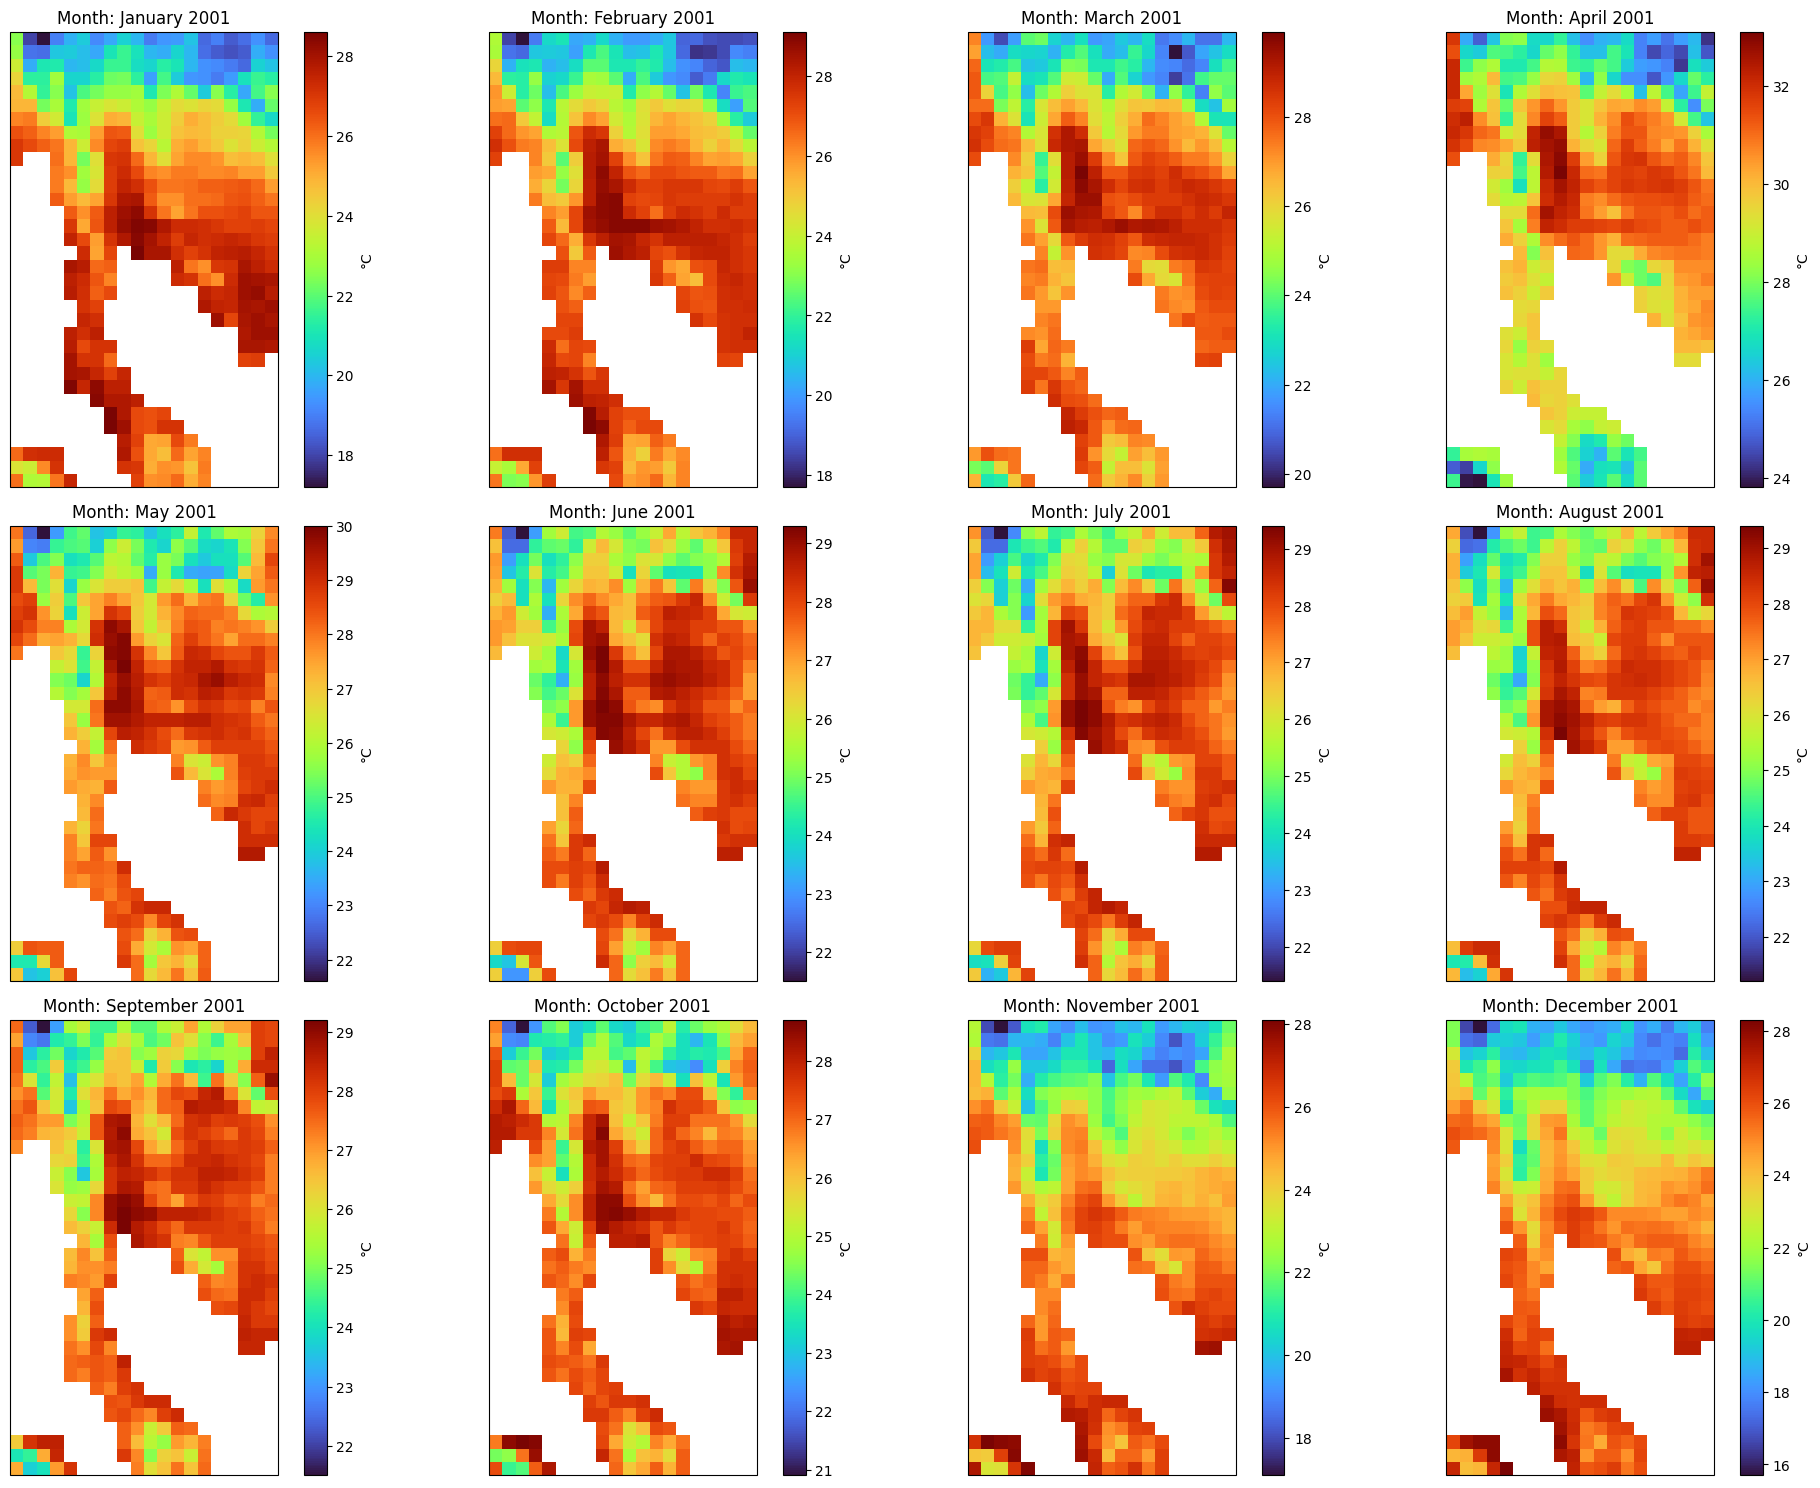

In [20]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลาในปี 2001
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# แปลงข้อมูลเวลา
time_values = temp['time'].values
time_dates = pd.to_datetime(time_values)

# ตั้งค่าพื้นที่พล็อต
fig, axes = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

# Loop สำหรับแต่ละเดือน
for i, time in enumerate(time_dates):
    ax = axes[i]
    month_data = temp.sel(time=time)['tmp']  # เลือกข้อมูลอุณหภูมิของเดือนนั้น
    
    # Plot แผนที่
    month_data.plot(ax=ax, cmap='turbo', transform=ccrs.PlateCarree(), cbar_kwargs={'label': '°C'})
    ax.set_title(f"Month: {time.strftime('%B %Y')}", fontsize=12)
    
    # เพิ่มรายละเอียดแผนที่
    ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())  # กำหนดขอบเขตพิกัด

# จัด Layout
plt.tight_layout()
plt.show()


## all data year 2001  to geojson 

In [18]:
import xarray as xr
import pandas as pd
import json

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลาในปี 2001
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# แปลงข้อมูลเวลา
time_values = temp['time'].values
time_dates = pd.to_datetime(time_values)

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon = temp['lon'].values
lat = temp['lat'].values
lon_step = float(lon[1] - lon[0])
lat_step = float(lat[1] - lat[0])

# เตรียมข้อมูลในรูปแบบ GeoJSON
features = []
for time_index, time in enumerate(time_dates):  # วนลูปสำหรับแต่ละเดือน
    month = time.month
    temp_in_month = temp.isel(time=time_index)  # เลือกข้อมูลของเดือนนั้น
    temp_values = temp_in_month['tmp'].values  # ค่าอุณหภูมิในเดือนนั้น [lat, lon]
    
    for i, lon_value in enumerate(lon):
        for j, lat_value in enumerate(lat):
            temperature = temp_values[j, i]  # ใช้ดัชนี [lat, lon]
            if not pd.isnull(temperature):  # ตรวจสอบว่าไม่มี NaN
                grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                features.append({
                    "type": "Feature",
                    "geometry": {
                        "type": "Polygon",
                        "coordinates": [grid_polygon]
                    },
                    "properties": {
                        "temperature": float(temperature),  # แปลง float32 เป็น float
                        "month": month  # เพิ่มข้อมูลเดือน
                    }
                })

# สร้างโครงสร้าง GeoJSON
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# บันทึกข้อมูลเป็นไฟล์ GeoJSON
output_file = "../Geo-data/Year-Dataset/data_year_2001.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(geojson_data, f, ensure_ascii=False, indent=4)

print(f"ข้อมูลถูกบันทึกในไฟล์ {output_file}")



ข้อมูลถูกบันทึกในไฟล์ ../Geo-data/Year-Dataset/data_year_2001.json


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import json

# โหลดข้อมูล GeoJSON
geojson_file = "../Geo-data/Year-Dataset/data_year_2001.json"
with open(geojson_file, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# แปลงข้อมูล GeoJSON เป็น GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

# ตรวจสอบว่าข้อมูลมีคอลัมน์ month และ temperature
if 'month' not in gdf.columns or 'temperature' not in gdf.columns:
    raise ValueError("GeoJSON data must contain 'month' and 'temperature' properties.")

# ตั้งค่าขอบเขตแผนที่ (พิกัด)
lon_min, lon_max = 96, 106
lat_min, lat_max = 4, 21

# Plot สำหรับทุกเดือน (1-12)
fig, axes = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle("Grid Cell Map for Each Month in 2001", fontsize=16)

# แสดงแผนที่ทีละเดือน
for month in range(1, 13):
    ax = axes[(month - 1) // 4, (month - 1) % 4]
    
    # เลือกข้อมูลสำหรับเดือนนั้น
    month_data = gdf[gdf['month'] == month]
    
    # แสดง grid cells ในแผนที่
    month_data.plot(column='temperature', ax=ax, cmap='turbo', edgecolor='k', legend=False)
    
    # ตั้งค่าแผนที่
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.set_title(f"Month {month}", fontsize=12)

# ปรับระยะห่าง subplot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
